# Finite Difference Methods for a Partial Differential Equation
This notebook will focus on numerically approximating a homogenous second order Partial Differential Equation.
## The Differential Equation
The general 2nd order Partial Differential Equation is of the form:
$$  \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial x^2}+\frac{\partial u}{\partial y} + \frac{\partial u}{\partial x}+u=f(x,y), \ \ \ (x,y) \in \Omega=(0,1)\times (0,1),$$
with boundary conditions
$$U(x,y) = g(x,y), \ \ \  (x,y)\in\delta\Omega\text{ - boundary}. $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
## To output results as a nice table
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



## Numerical Method
The Partial Differential Equation  is discretised using 
$\delta_x^2$ is the central difference approximation of the second derivative in the $x$ direction
$$\delta_x^2w_{ij}=\frac{1}{h^2}(w_{i+1j}-2w_{ij}+w_{i-1j}), $$
$\delta_y^2$ is the central difference approximation of the second derivative in the $y$ direction
$$\delta_y^2w_{ij}=\frac{1}{h^2}(w_{ij+1}-2w_{ij}+w_{ij-1}), $$

$D_x^0$ is the central difference approximation of the first derivative in the $x$ direction
$$D_x^0w_{ij}=\frac{1}{2h}(w_{i+1j}-w_{i-1j}), $$
and $D_y^0$ is the central difference approximation of the first derivative in the $y$ direction
$$D_y^0w_{ij}=\frac{1}{2h}(w_{ij+1}-w_{ij-1}). $$

The gives the Partial Difference Equation,
$$(\delta_x^2w_{ij}+\delta_y^2w_{ij})+D^0_xw_{ij}+D^0_yw_{ij}+w_{ij}=f_{ij} \ \ (x_i,y_j) \in \Omega_h, $$
$$w_{ij}=g_{ij} \ \ (x_i,y_j) \in \partial\Omega_h, $$
where $w_ij$ is the numerical approximation of $U$ at $x_i$ and $y_j$.
Expanding the  the Difference Equation gives,
$$2(w_{i-1j}+w_{ij-1}-4w_{ij}+w_{ij+1}+w_{i+1j})+h(w_{i+1j}-w_{i-1j})+h(w_{ij}-w_{ij-1})+2w_{ij}=2h^2f_{ij} $$
rearnging 
$$((2-h)w_{i-1j}+(2-h)w_{ij-1}-6w_{ij}+(2+h)w_{ij+1}+(2+h)w_{i+1j})=2h^2f_{ij} $$
for $i=1,...,N-1$ and $j=1,...,N-1.$

### Matrix form
This can be written as a system of $(N-1)\times(N-1)$ equations can be arranged in matrix form
$$ A\mathbf{w}=\mathbf{r},$$
where $A$ is an $(N-1)^2\times(N-1)^2$  matrix made up of the following block tridiagonal structure
$$\left(\begin{array}{ccccccc}
T&D_U&0&0&.&.&.\\
D_L&T&D_U&0&0&.&.\\
.&.&.&.&.&.&.\\
.&.&.&.&.&.&.\\
.&.&.&0&D_L&T&D_U\\
.&.&.&.&0&D_L&T\\
\end{array}\right),
$$
where $D_L$ denotes an $N-1 \times N-1$ lower diagonal matrix 
$$ D_L=\left(\begin{array}{ccccccc}
2-h&0&0&0&.&.&.\\
0&2-h&0&0&0&.&.\\
.&.&.&.&.&.&.\\
.&.&.&.&.&.&.\\
.&.&.&0&&2-h&0\\
.&.&.&.&0&0&2-h\\
\end{array}\right),
$$
$D_U$ denotes an $N-1 \times N-1$ upper diagonal matrix
$$ D_U=\left(\begin{array}{ccccccc}
2+h&0&0&0&.&.&.\\
0&2+h&0&0&0&.&.\\
.&.&.&.&.&.&.\\
.&.&.&.&.&.&.\\
.&.&.&0&&2+h&0\\
.&.&.&.&0&0&2+h\\
\end{array}\right),
$$
and $T$ is the tridiagonal matrix of the form:
$$ T=\left(\begin{array}{ccccccc}
-6&2+h&0&0&.&.&.\\
2-h&-6&2+h&0&0&.&.\\
.&.&.&.&.&.&.\\
.&.&.&.&.&.&.\\
.&.&.&0&2-h&-6&2+h\\
.&.&.&.&0&2-h&-6\\
\end{array}\right).
$$
The plot below shows the matrix $A$ and its inverse $A^{-1}$ as a colourplot.

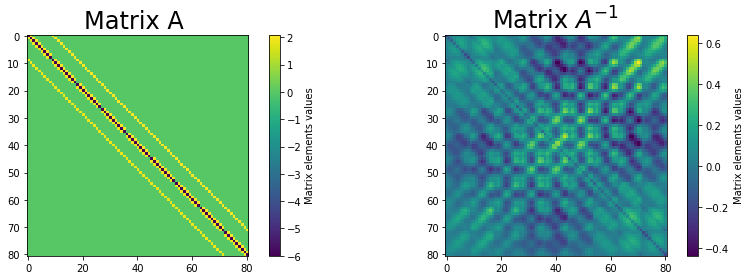

In [2]:
N=10
h=1/N

x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))
## Diagonal            
for i in range (0,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j]=-6

# LOWER DIAGONAL        
for i in range (1,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j-1]=2-h   
# UPPPER DIAGONAL        
for i in range (0,N-2):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j+1]=2+h   

# LOWER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (1,N-1):           
        A[i+(N-1)*j,i+(N-1)*(j-1)]=2-h        
        
        
# UPPER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (0,N-2):           
        A[i+(N-1)*j,i+(N-1)*(j+1)]=2+h
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title('Matrix A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

fig.tight_layout()
plt.show();


The vector $\mathbf{w}$ is of length $(N-1)\times(N-1)$ which made up of $N-1$ subvectors $\mathbf{w}_j$  of length $N-1$ of the form
$$\mathbf{w}_j=\left(\begin{array}{c}
w_{1j}\\
w_{2j}\\
.\\
.\\
w_{N-2j}\\
w_{N-1j}\\
\end{array}\right).
$$
The vector $\mathbf{r}$ is of length $(N-1)\times(N-1)$ which made up of $N-1$ subvectors of the form $\mathbf{r}_j=-h^2\mathbf{f}_j-\mathbf{bx}_{j}-\mathbf{by}_j$, 
where $\mathbf{bx}_j $ is the vector of left and right boundary conditions 
$$\mathbf{bx}_j =\left(\begin{array}{c}
(2-h)w_{0j}\\
0\\
.\\
.\\
0\\
(2+h)w_{Nj}
\end{array}\right),
$$

for $j=1,..,N-1$, where $\mathbf{by}_j$ is the vector of the lower boundary condition for $j=1$,

$$
\mathbf{by}_{1} =(2-h)\left(\begin{array}{c}
w_{10}\\
w_{20}\\
.\\
.\\
w_{N-20}\\
w_{N-10}\\
\end{array}\right),
$$
upper boundary condition for $j=N-1$

$$
\mathbf{by}_{N-1} =(2+h)\left(\begin{array}{c}
w_{1N}\\
w_{2N}\\
.\\
.\\
w_{N-2N}\\
w_{N-1N}\\
\end{array}\right),
$$
for $j=2,...,N-2$ $$\mathbf{by}_j=0,$$
and 
$$\mathbf{f}_j =2h^2\left(\begin{array}{c}
f_{1j}\\
f_{2j}\\
.\\
.\\
f_{N-2j}\\
f_{N-1j}
\end{array}\right)
$$
for $j=1,...,N-1$.


In [3]:
r=np.zeros(N2)

# vector r      
for i in range (0,N-1):
    for j in range (0,N-1):           
        r[i+(N-1)*j]=2*100*h*h*(x[i+1]*x[i+1]+y[j+1]*y[j+1])     
# Boundary        
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=(2-h)*np.sin(2*np.pi*x[i+1]) #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=(2+h)*np.sin(2*np.pi*x[i+1])# Top Boundary
      
b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=(2-h)*2*np.sin(2*np.pi*y[j+1]) # Left Boundary
    b_left_right[N-2+(N-1)*j]=(2+h)*2*np.sin(2*np.pi*y[j+1])# Right Boundary
    
b=b_left_right+b_bottom_top

# Example Implementation Equation

Consdier the 2nd order Partial Differential Equation is of the form:
$$  \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial x^2}+\frac{\partial u}{\partial y} + \frac{\partial u}{\partial x}+u=100(x^2+y^2), \ \ \ (x,y) \in \Omega=(0,1)\times (0,1),$$
with boundary conditions
$$ w_{i0}=w[i,0]=\sin(2\pi x[i]), \text{ for } i=0,...,10, \text{ upper},$$  

$$  w_{iN}=w[i,N]=\sin(2\pi x[i]), \text{ for } i=0,...,10,  \text{ lower},$$

$$  w_{0j}=w[0,j]=2\sin(2\pi y[j]), \text{ for } j=0,...,10,   \text{ left},$$
$$  w_{Nj}=w[N,j]=2\sin(2\pi y[j]), \text{ for } i=0,...,10,\text{ right}. $$

The figure below plots the boundary values of $w[i,j]$.

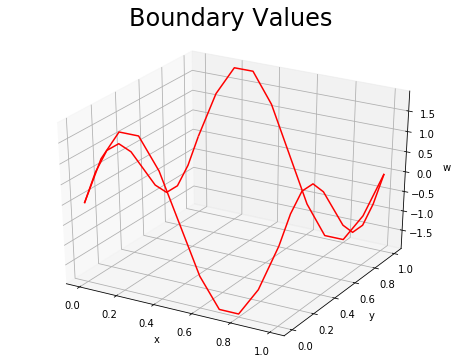

In [4]:
w=np.zeros((N+1,N+1))

for i in range (0,N):
        w[i,0]=np.sin(2*np.pi*x[i]) #left Boundary
        w[i,N]=np.sin(2*np.pi*x[i]) #Right Boundary

for j in range (0,N):
        w[0,j]=2*np.sin(2*np.pi*y[j]) #Lower Boundary
        w[N,j]=2*np.sin(2*np.pi*y[j]) #Upper Boundary

        
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r', rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
plt.title(r'Boundary Values',fontsize=24,y=1.08)
plt.show()

## Results
## Discrete Grid
The region $\Omega=(0,1)\times(0,1)$ is discretised into a uniform mesh $\Omega_h$. In the  $x$ and $y$ directions into $N$ steps giving a stepsize of
$$ h=\frac{1-0}{N},$$
resulting in 
$$x[i]=0+ih, \ \ \  i=0,1,...,N,$$
and 
$$y[j]=0+jh, \ \ \  j=0,1,...,N,$$
The figure below shows the discrete grid points for $N=10$,  the known boundary conditions (green),  and the unknown values (red) of the Partial Differential Equation.

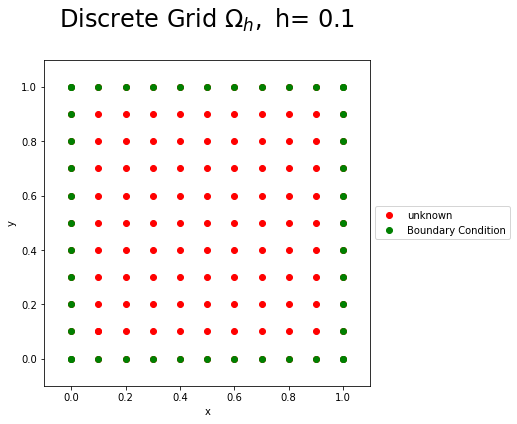

In [5]:

x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,6))
plt.plot(x[1],y[1],'ro',label='unknown');
plt.plot(X,Y,'ro');
plt.plot(np.ones(N+1),y,'go',label='Boundary Condition');
plt.plot(np.zeros(N+1),y,'go');
plt.plot(x,np.zeros(N+1),'go');
plt.plot(x, np.ones(N+1),'go');
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s'%(h),fontsize=24,y=1.08)
plt.show();

To solve the system for $\mathbf{w}$ invert the matrix $A$
$$ A\mathbf{w}=\mathbf{r},$$
such that
$$ \mathbf{w}=A^{-1}\mathbf{r}.$$
Lastly, as $\mathbf{w}$ is in vector it has to be reshaped into grid form to plot.

The figure below shows the numerical approximation of the Equation.

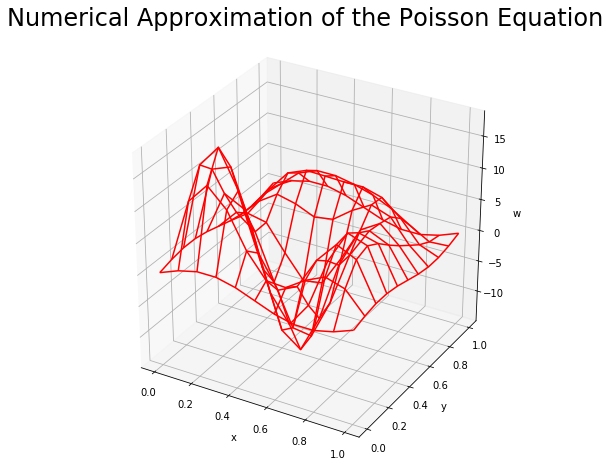

In [6]:
C=np.dot(Ainv,r-b)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
plt.show();